# Analyse de données nutritionnelles : Nettoyage de données

In [3]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

with zipfile.ZipFile('fr.openfoodfacts.org.products.csv.zip') as archive:
    with archive.open('fr.openfoodfacts.org.products.csv') as csv_file:
        df = pd.read_csv(csv_file, sep="\t", encoding='utf-8')

In [75]:
with pd.option_context('max_columns', 0):
    display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


None

In [76]:
with pd.option_context('max_columns', 0):
    display(df.sample(10))

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,...,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
28661,33613027256,http://world-fr.openfoodfacts.org/produit/0033...,usda-ndb-import,1489074519,2017-03-09T15:48:39Z,1489074519,2017-03-09T15:48:39Z,"Chubby, Rock N' Rolla Cola",NaN,NaN,NaN,NaN,S. M. Jaleel & Co. Ltd.,s-m-jaleel-co-ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Carbonated water, sugar, caramel color, phosph...",NaN,NaN,NaN,NaN,NaN,250 ml (1 BOTTLE),NaN,2.0,[ carbonated-water -> en:carbonated-water ] ...,"en:e150a,en:e338","E150a - Caramel E150a,E338 - Acide orthophosph...",0.0,NaN,NaN,0.0,NaN,NaN,NaN,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,...,11.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.01016,0.004000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN
244827,3596710002467,http://world-fr.openfoodfacts.org/produit/3596...,openfoodfacts-contributors,1395842903,2014-03-26T14:08:23Z,1486683063,2017-02-09T23:31:03Z,Crousty pomme verte,Barres céréalières à la pomme verte,126 g,"Boîte,Carton,Plastique","boite,carton,plastique",Auchan,auchan,"Snacks sucrés,Barres,Barres de céréales","en:sugary-snacks,en:bars,en:cereal-bars","Snacks sucrés,Barres,Barres de céréales",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Olivet,France",Auchan,France,en:france,France,"Céréales 43,5 % [flocons d'avoine (contient _g...","gluten, gluten, gluten, disulfite",NaN,"Lait,Fruits à coque,Arachides,Soja","en:milk,en:nuts,en:peanuts,en:soybeans","Lait,Fruits à coque,Arachides,Soja",21 g,NaN,4.0,[ cereales-43 -> fr:cereales-43 ] [ cereale...,"en:e223,en:e420,en:e524,en:e473","E223 - Disulfite de sodium,E420 - Sorbitol,E52...",1.0,NaN,huile-de-palme,0.0,NaN,NaN,NaN,c,unknown,unknown,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:sugary-snacks,...,28.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.3,5.60,NaN,NaN,NaN,0.53000,0.208661,NaN,Na

In [77]:
with pd.option_context('max_columns', 0):
    display(df.describe())

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,414.000000,200886.000000,259922.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,5.129932,NaN,NaN,7.4,6.040000,36.136182,18.9,8.1,3.0,10.752667,10.673913,NaN,NaN,61.0,NaN,10.425055,6.312493,3.182103,2.250285,3.186553,1.635462,16.229144,3.823819,0.057000,0.153842,0.061567,40.192857,25.123077,NaN,1.357143e-06,NaN,NaN,NaN,0.073476,0.020071,32.073981,16.003484,11.841667,2.878846,25.897368,6.354084,24.325000,12.163636,31.925000,49.790389,2.862111,7.075940,4.658148,2.506250,0.021678,2.028624,0.798815,7.838105,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,8.938696e-05,0.121290,0.072138,0.013123,0.119052,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,1.594563,0.145762,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,8.014238,NaN,NaN,NaN,0.226274,24.101433,NaN,NaN,NaN,4.019993,3.379647,NaN,NaN,NaN,NaN,17.0761

## Analyse du nombre de valeurs non nulles par colonnes

In [78]:
columns_filled = df.count()
columns_filled.sort_values(ascending=False, inplace=True)

In [79]:
print(f"number of columns: {len(columns_filled)}")
with pd.option_context('max_columns', 500, 'max_rows', 500):
    print(columns_filled)

number of columns: 162
last_modified_t                               320772
last_modified_datetime                        320772
creator                                       320770
created_t                                     320769
created_datetime                              320763
code                                          320749
url                                           320749
states_tags                                   320726
states_fr                                     320726
states                                        320726
countries                                     320492
countries_tags                                320492
countries_fr                                  320492
product_name                                  303010
brands                                        292360
brands_tags                                   292352
energy_100g                                   261113
proteins_100g                                 259922
salt_100g              

### Distribution des colonnes le d'après nombre de valeurs non nulles

C:\Users\Jerome\Anaconda3\envs\py37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


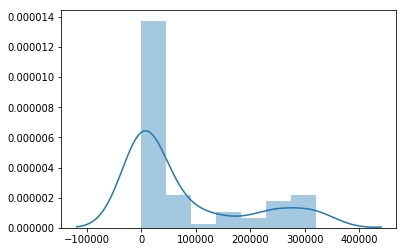

In [80]:
sns.distplot(df.count())

### Nombre de valeurs non nulles par colonne

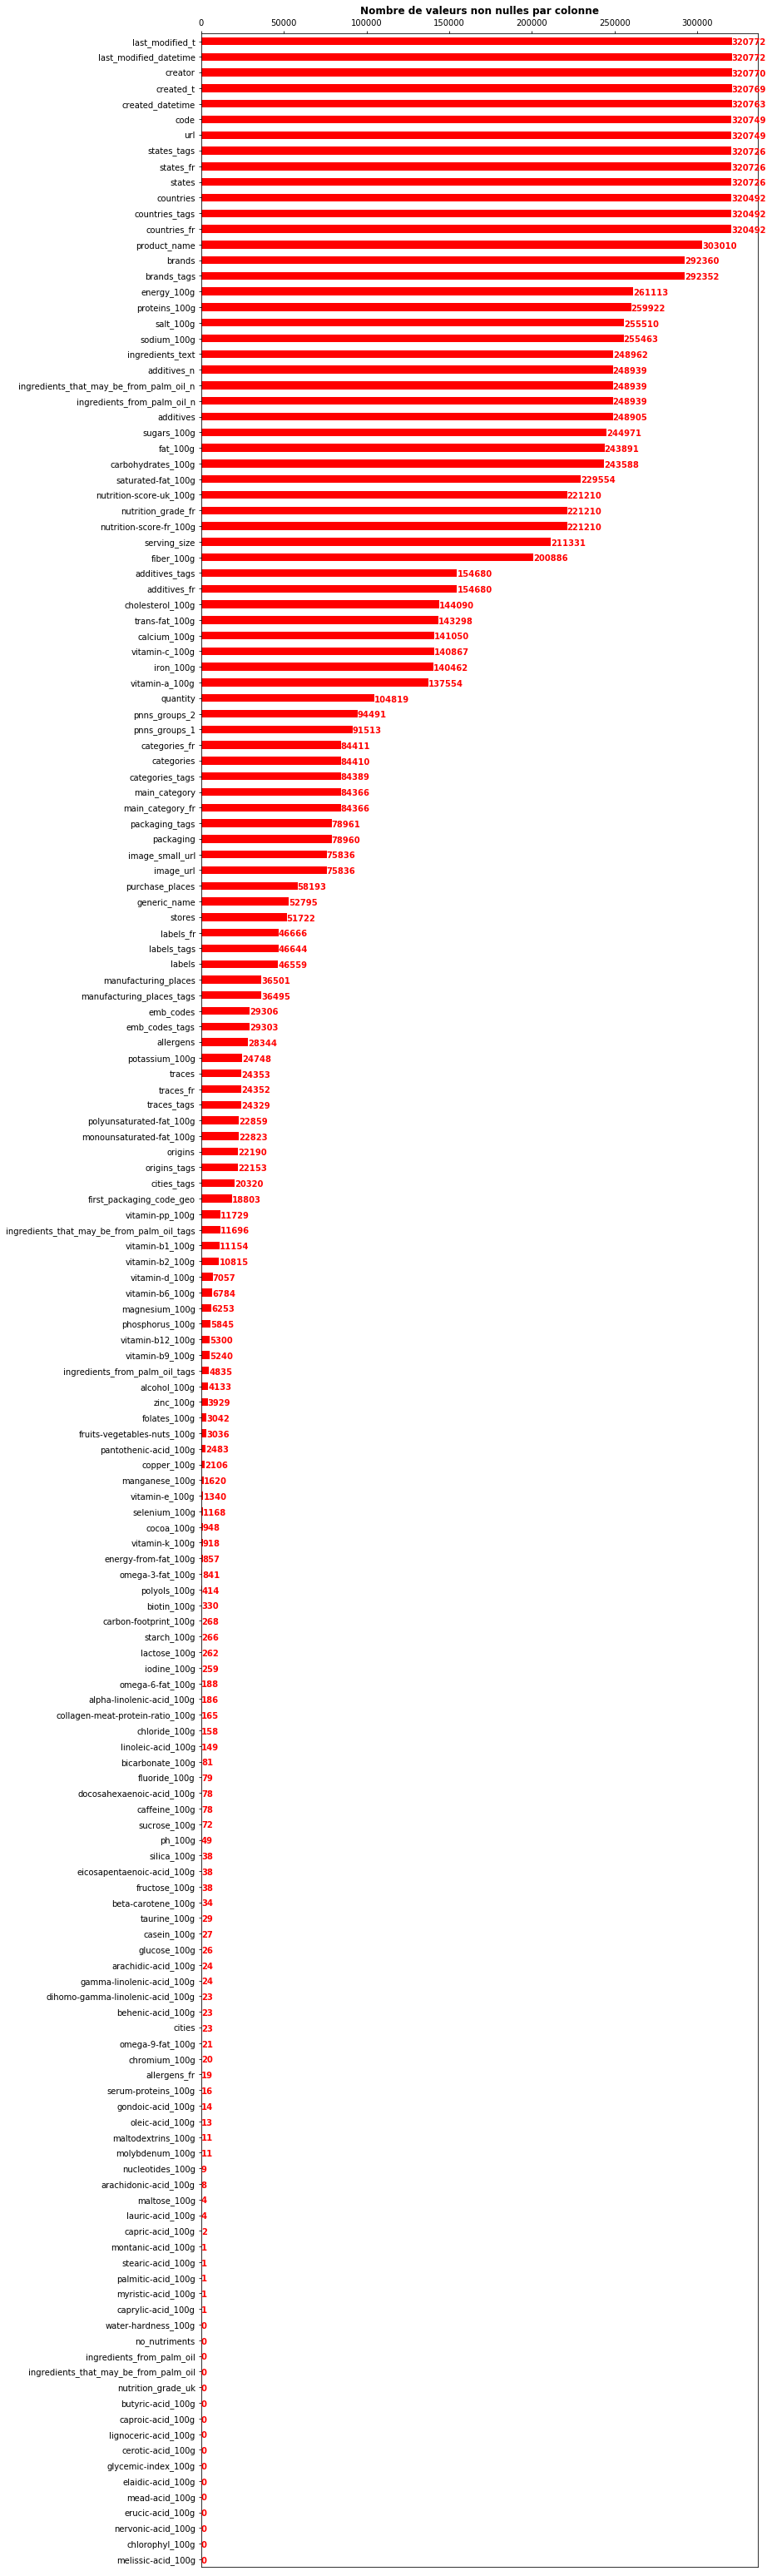

In [81]:
fig, ax = plt.subplots(figsize=(12,56))
columns_filled.plot.barh(ax=ax, color='red')
plt.gca().invert_yaxis()
ax.set_title("Nombre de valeurs non nulles par colonne", fontweight='bold')
ax.xaxis.tick_top()
for i, v in enumerate(columns_filled):
    ax.text(v + 3, i + .25, str(v), color='red', fontweight='bold')

### Suppression des colonnes vides

In [26]:
df_save = df.drop(columns=[    
    'ingredients_from_palm_oil',
    'no_nutriments',
    'ingredients_that_may_be_from_palm_oil',
    'nutrition_grade_uk',
])

## Analyse de l'état de la complétion de la base via la colonne "states_tags"

In [83]:
states_tags = {}
for i in df.index:
    tags = str(df.at[i, 'states_tags']).split(",")
    for tag in tags:
        if tag in states_tags:
            states_tags[tag] += 1
        else:
            states_tags[tag] = 1
            
sorted_states_tags = sorted(states_tags, key=states_tags.get, reverse=True)

for tag in sorted_states_tags:
    print(f"{tag}: {states_tags[tag]}")

en:product-name-completed: 302953
en:brands-completed: 292328
en:expiration-date-to-be-completed: 278623
en:nutrition-facts-completed: 274697
en:to-be-completed: 261605
en:ingredients-completed: 248731
en:characteristics-to-be-completed: 248261
en:packaging-to-be-completed: 241786
en:categories-to-be-completed: 236360
en:packaging-code-to-be-completed: 232213
en:quantity-to-be-completed: 215946
en:photos-to-be-uploaded: 184160
en:photos-uploaded: 136566
en:quantity-completed: 104770
en:categories-completed: 84356
en:packaging-completed: 78931
en:characteristics-completed: 72465
en:ingredients-to-be-completed: 71995
en:photos-to-be-validated: 69200
en:photos-validated: 67366
en:to-be-checked: 59121
en:complete: 59121
en:nutrition-facts-to-be-completed: 46029
en:expiration-date-completed: 42103
en:brands-to-be-completed: 28387
en:product-name-to-be-completed: 17762
en:packaging-code-completed: 7496
en:empty: 99
nan: 46


In [84]:
with pd.option_context('max_columns', 0):
    display(df[(df['states_tags'].str.contains("en:empty"))
      | (df['states_tags'].isna())
    ].sample(15))

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,...,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
176764,2000000045978,http://world-fr.openfoodfacts.org/produit/2000...,openfoodfacts-contributors,1492705982,2017-04-20T16:33:02Z,1492705982,2017-04-20T16:33:02Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:empty, en:to-be-completed, en:nutrition-fac...","en:empty,en:to-be-completed,en:nutrition-facts...","Vide,A compléter,Informations nutritionnelles ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176752,2000000045966,http://world-fr.openfoodfacts.org/produit/2000...,openfoodfacts-contributors,1492696274,2017-04-20T13:51:14Z,1492696274,2017-04-20T13:51:14Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:ES,en:spain,Espagne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:empty, en:to-be-completed, en:nutrition-fac...","en:empty,en:to-be-completed,en:nutrition-facts...","Vide,A compléter,Informations nutritionnelles ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111719,01570007288,http://world-fr.openfoodfacts.org/produit/0157...,openfoodfacts-contributors,1492690510,2017-04-20T12:15:10Z,1492690510,2017-04-20T12:15:10Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:US,en:united-states,États-Unis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:empty, en:to-be-completed, en:nutrition-fac...","en:empty,en:to-be-completed,en:nutrition-facts...","Vide,A compléter,Informations nutritionnelles ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Suppression des lignes vides car sans information intéressante

In [27]:
df_save.dropna(subset=['states_tags'], inplace=True)
df_save = df_save[~df_save['states_tags'].str.contains("en:empty")]

In [86]:
# complentary tag couples and associated titles

compl_states = [
    [
        'en:complete',
        'en:to-be-completed',
    ],
    [
        'en:nutrition-facts-completed',
        'en:nutrition-facts-to-be-completed',
    ],
    [
        'en:ingredients-completed',
        'en:ingredients-to-be-completed',
    ],
    [
        'en:brands-completed',
        'en:brands-to-be-completed',
    ],
    [
        'en:product-name-completed',
        'en:product-name-to-be-completed',
    ],
    [
        'en:categories-completed',
        'en:categories-to-be-completed',
    ],
    [
        'en:quantity-completed',
        'en:quantity-to-be-completed',
    ],
    [
        'en:characteristics-completed',
        'en:characteristics-to-be-completed',
    ],
    [
        'en:packaging-code-completed',
        'en:packaging-code-to-be-completed',
    ],
    [
        'en:packaging-completed',
        'en:packaging-to-be-completed',
    ],
    [
        'en:photos-uploaded',
        'en:photos-to-be-uploaded',
    ],
    [
        'en:photos-validated',
        'en:photos-to-be-validated',
    ],
    [
        'en:expiration-date-completed',
        'en:expiration-date-to-be-completed',
    ],
]
        

bar_titles = [
    'complete',
    'nutrition_facts',
    'ingredients',
    'brands',
    'product_name',
    'categories',
    'quantity',
    'characteristics',
    'packaging_code',
    'packaging',
    'photos_uploaded',
    'photos_validated',
    'expiration_date',
]

### Etude de la complétion des éléments de la base d'après les tags

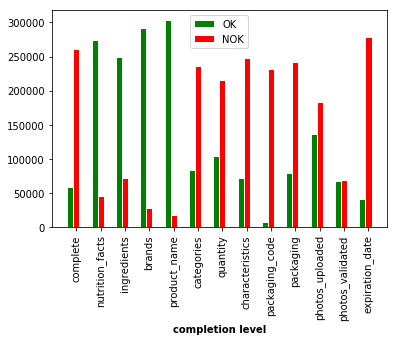

In [87]:
# set width of bar
barWidth = 0.25
 
# set height of bar
tagsOK = [couple_values[0] for couple_values in compl_states]
tagsNOK = [couple_values[1] for couple_values in compl_states]

barsOK = [states_tags[s] for s in tagsOK]
barsNOK = [states_tags[s] for s in tagsNOK]

# Set position of bar on X axis
rOK = np.arange(len(barsOK))
rNOK = [x + barWidth for x in rOK]
 
# Make the plot
plt.bar(rOK, barsOK, color='green', width=barWidth, edgecolor='white', label='OK')
plt.bar(rNOK, barsNOK, color='red', width=barWidth, edgecolor='white', label='NOK')
 
# Add xticks on the middle of the group bars
plt.xlabel('completion level', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(barsOK))], bar_titles, rotation='vertical')
 
# Create legend & Show graphic
plt.legend()
plt.show()

### Vérification que les tags d'état sont mutuellements exclusifs

In [88]:
for i, couple in enumerate(compl_states):
    contains_both_tags = len(df[(df['states_tags'].str.contains(couple[0])) & (df['states_tags'].str.contains(couple[1]))].index)
    print(f"{bar_titles[i]}: {contains_both_tags}")


complete: 0
nutrition_facts: 0
ingredients: 0
brands: 0
product_name: 0
categories: 0
quantity: 0
characteristics: 0
packaging_code: 0
packaging: 0
photos_uploaded: 0
photos_validated: 0
expiration_date: 0


### Création de colonne dummies pour analyse

In [89]:
tags_df = pd.DataFrame(columns=bar_titles, index=df.index)
dummies_cols = bar_titles

for i, couple in enumerate(compl_states):
    tags_df[dummies_cols[i]] = df['states_tags'].str.contains(couple[0], na=False).astype(np.uint8)

tags_df.head(5)

,complete,nutrition_facts,ingredients,brands,product_name,categories,quantity,characteristics,packaging_code,packaging,photos_uploaded,photos_validated,expiration_date
0,0,0,0,1,1,0,1,0,0,0,1,0,0
1,0,1,1,0,1,0,0,0,0,0,0,0,0
2,0,1,1,1,1,0,0,0,0,0,0,0,0
3,0,1,1,1,1,0,0,0,0,0,0,0,0
4,0,1,1,1,1,0,0,0,0,0,0,0,0


### Analyse de la signification du tag "to be checked"

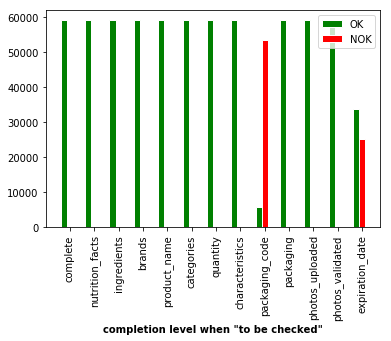

In [90]:
# Create bars in the same fashion with "to_be_checked" == 1
tags_df['to_be_checked'] = df['states_tags'].str.contains("to-be-checked", na=False).astype(np.uint8)

barsOK = [len(tags_df[(tags_df['to_be_checked'] == 1) & (tags_df[col] == 1)].index) for col in dummies_cols]
barsNOK = [len(tags_df[(tags_df['to_be_checked'] == 1) & (tags_df[col] == 0)].index) for col in dummies_cols]

# Set position of bar on X axis
rOK = np.arange(len(barsOK))
rNOK = [x + barWidth for x in rOK]
 
# Make the plot
plt.bar(rOK, barsOK, color='green', width=barWidth, edgecolor='white', label='OK')
plt.bar(rNOK, barsNOK, color='red', width=barWidth, edgecolor='white', label='NOK')
 
# Add xticks on the middle of the group bars
plt.xlabel('completion level when "to be checked"', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(barsOK))], bar_titles, rotation='vertical')
 
# Create legend & Show graphic
plt.legend()
plt.show()

"to be checked" équivalent à "complete", colonne dummy à supprimer

### Proportion de variables nulles deux à deux pour un même individu

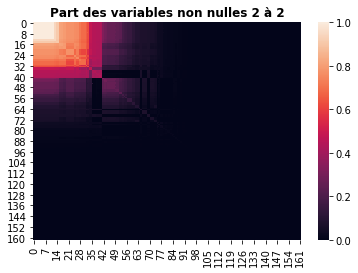

In [91]:
sorting_col_list = columns_filled.index.tolist()
df_most_populated_cols = df.reindex(labels=sorting_col_list, axis=1)

notna = np.array(df_most_populated_cols.notna() * 1).astype("float")

both_not_na = np.dot(notna.T, notna)
both_not_na = both_not_na / len(df.index)

sns.heatmap(both_not_na)
plt.title("Part des variables non nulles 2 à 2", fontweight='bold')
plt.show()

### Focus sur les colonnes relatives à la nutrition

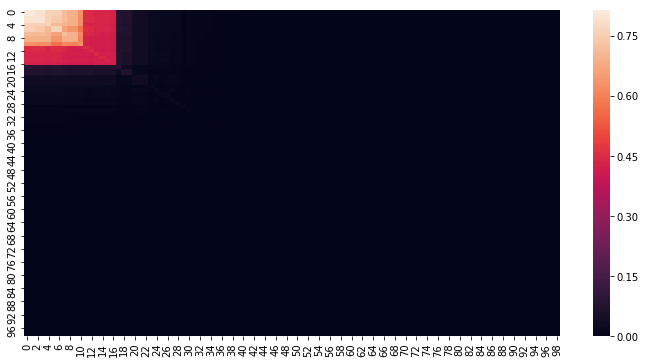

In [92]:
nutritional_info_cols = [col for col in df.columns if "100g" in col]
nutri_sorting_col_list = [col for col in sorting_col_list if "100g" in col]

nutri_df = df.xs(key=nutritional_info_cols, axis=1)
nutri_df = nutri_df.reindex(labels=nutri_sorting_col_list, axis=1)
nutri_notna = np.array(nutri_df.notna() * 1).astype("float")
nutri_both_not_na = np.dot(nutri_notna.T, nutri_notna)
nutri_both_not_na = nutri_both_not_na / len(df.index)

fig, ax = plt.subplots(figsize=(12,6))
ax = sns.heatmap(nutri_both_not_na)

In [93]:
print(nutri_both_not_na.diagonal()[16:18])

[0.42882172 0.07715137]


Chute significative entre la 17e colonne la plus remplie et la 18e : de 43% à moins de 8%

#### Liste des 17 colonnes concernant des nutriments les plus remplies

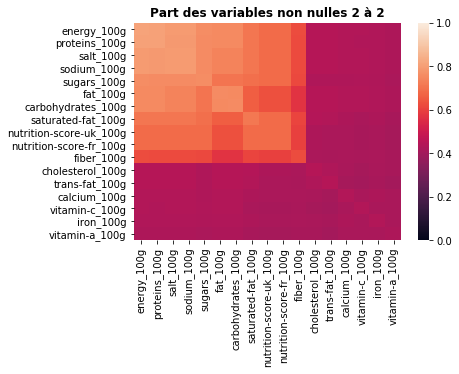

In [94]:
ax = plt.axes()
sns.heatmap(nutri_both_not_na[:17,:17], xticklabels=nutri_df.columns[:17], yticklabels=nutri_df.columns[:17], vmin=0, vmax=1, ax=ax)
ax.set_title("Part des variables non nulles 2 à 2", fontweight='bold')
plt.show()

### Comparaison des colonnes qui semblent être en doublon

In [95]:
def compare_cols(df, cols, sample=5):
    tmp = pd.DataFrame(columns=cols)
    for col in cols:
        tmp = pd.concat((tmp, df[~df[col].isna()][cols].sample(sample)))
    with pd.option_context('max_colwidth', 0):
        display(tmp)

In [96]:
compare_cols(df_save, ['packaging', 'packaging_tags'])

,packaging,packaging_tags
195730,"Comprimés effervescents,Tube - Plastique,Boite - carton","comprimes-effervescents,tube-plastique,boite-carton"
188848,Plastique,plastique
216704,"barquette,plastique","barquette,plastique"
252574,Plastique,plastique
277965,"Pot,Plastique","pot,plastique"
270392,"Boite-en-carton,Sachets dans Boite en carton,Sachet","boite-en-carton,sachets-dans-boite-en-carton,sachet"
260064,Glas,glas
196513,"Sachet,plastique","sachet,plastique"
292635,"Plastique,Aluminium","plastique,aluminium"
255285,"Canette alu,Point vert,Tidyman wastebasket","canette-alu,point-vert,tidyman-wastebasket"


In [97]:
compare_cols(df_save, ['brands', 'brands_tags'])

,brands,brands_tags
228020,Monoprix Gourmet,monoprix-gourmet
100138,Glencourt Inc.,glencourt-inc
309845,El Corte Inglés,el-corte-ingles
27229,Italian Village,italian-village
6832,Tetley,tetley
160602,"Pro Bar, Probar Llc","pro-bar,probar-llc"
268383,Артек,артек
248127,Bonne Maman,bonne-maman
105963,Soy Vay,soy-vay
238024,Produits Blancs,produits-blancs


In [98]:
compare_cols(df_save, ['categories', 'categories_tags', 'categories_fr'])

,categories,categories_tags,categories_fr
238198,"Produits laitiers,Yaourts,Yaourts vanille,Yaourts entiers","en:dairies,en:yogurts,en:vanilla-yogurt,en:whole-milk-yogurts","Produits laitiers,Yaourts,Yaourts vanille,Yaourts entiers"
155126,Flocons,"en:plant-based-foods-and-beverages,en:plant-based-foods,en:flakes","Aliments et boissons à base de végétaux,Aliments d'origine végétale,Flocons"
189295,"Produits laitiers,Yaourts,Yaourts allégés en matière grasse,Yaourts natures,Frais,Desserts","en:fresh-foods,en:dairies,en:desserts,en:yogurts,en:low-fat-yogurts,en:plain-yogurts","Frais,Produits laitiers,Desserts,Yaourts,Yaourts allégés en matière grasse,Yaourts natures"
276311,Chocolats noirs,"en:sugary-snacks,en:chocolates,en:dark-chocolates","Snacks sucrés,Chocolats,Chocolats noirs"
217491,"Aliments et boissons à base de végétaux,Aliments d'origine végétale,Matières grasses,Graines de tournesol et dérivés,Matières grasses végétales,Huiles,Huiles de tournesol","en:plant-based-foods-and-beverages,en:plant-based-foods,en:fats,en:sunflower-seeds-and-their-products,en:vegetable-fats,en:vegetable-oils,en:sunflower-oils","Aliments et boissons à base de végétaux,Aliments d'origine végétale,Matières grasses,Graines de tournesol et dérivés,Matières grasses végétales,Huiles,Huiles de tournesol"
267610,"Пшено шлифованное первого сорта,en:Millet","en:plant-based-foods-and-beverages,en:plant-based-foods,en:cereals-and-potatoes,en:cereals-and-their-products,en:seeds,en:cereal-grains,en:millet,ru:пшено-шлифованное-первого-сорта","Aliments et boissons à base de végétaux,Aliments d'origine végétale,Céréales et pommes de terre,Céréales et dérivés,Graines,Céréales en grains,Millet,ru:Пшено-шлифованное-первого-сорта"
221068,"Fromages blancs,Fromages de chèvre,Fromages pasteurisés","en:dairies,en:cheeses,en:pasteurized-cheeses,en:goat-cheese,fr:fromages-blancs","Produits laitiers,Fromages,Fromages pasteurisés,Fromages de chèvre,Fromages blancs"
303985,Legumi,it:legumi,it:Legumi
253067,"Aliments et boissons à base de végétaux,Aliments d'origine végétale,Produits déshydratés,Aliments à base de plantes séchés,Champignons et produits dérivés,Champignons séchés,Champignons noirs,Champignons noirs séchés","en:plant-based-foods-and-beverages,en:plant-based-foods,en:dried-products,en:dried-plant-based-foods,en:mushrooms-and-their-products,en:dried-mushrooms,fr:champignons-noirs,fr:champignons-noirs-seches","Aliments et boissons à base de végétaux,Aliments d'origine végétale,Produits déshydratés,Aliments à base de plantes séchés,Champignons et produits dérivés,Champignons séchés,Champignons-noirs,Champignons-noirs-seches"
230758,"Produits laitiers,Fromages,Fromages des Pays-Bas,Goudas,Fromages de chèvre","en:dairies,en:cheeses,en:cheeses-of-the-netherlands,en:gouda,en:goat-cheese","Produits laitiers,Fromages,Fromages des Pays-Bas,Goudas,Fromages de chèvre"


In [99]:
compare_cols(df_save, ['origins', 'origins_tags'])

,origins,origins_tags
211199,France,france
220095,Sardines (Sardina pilchardus),sardines-sardina-pilchardus
3363,United States,united-states
66709,Canada,canada
267939,Taiwan,taiwan
229818,Italie,italie
245247,France,france
228219,France,france
202084,"Villepinte,France","villepinte,france"
293020,"France,Espagne","france,espagne"


In [100]:
compare_cols(df_save, ['manufacturing_places', 'manufacturing_places_tags'])

,manufacturing_places,manufacturing_places_tags
189107,France,france
196469,France,france
208595,"Isigny-sur-Mère,Calvados,Normandie,France","isigny-sur-mere,calvados,normandie,france"
197951,France,france
277121,"Cooperl Arc Atlantique - 7 Rue de la Jeannaie Maroué - Zone Industrielle - 22400 Lamballe,Côtes-d'Armor,Bretagne,France","cooperl-arc-atlantique-7-rue-de-la-jeannaie-maroue-zone-industrielle-22400-lamballe,cotes-d-armor,bretagne,france"
292148,"Herta SAS - Route d'Ostreville - Zone Industrielle - 62130 Saint-Pol-sur-Ternoise,Pas-de-Calais,Nord-Pas-de-Calais,France","herta-sas-route-d-ostreville-zone-industrielle-62130-saint-pol-sur-ternoise,pas-de-calais,nord-pas-de-calais,france"
310910,"Lezo, Guipúzcoa, País Vasco, España","lezo,guipuzcoa,pais-vasco,espana"
236876,"Candia (Filiale Sodiaal International) - 1040 Route Nationale - 59400 Awoingt,Nord,Nord-Pas-de-Calais,Candia (Filiale Sodiaal International) - Avenue Marcel Dassault - ZI Induspal - 64140 Lons,Pyrénées-Atlantiques,Aquitaine,France","candia-filiale-sodiaal-international-1040-route-nationale-59400-awoingt,nord,nord-pas-de-calais,candia-filiale-sodiaal-international-avenue-marcel-dassault-zi-induspal-64140-lons,pyrenees-atlantiques,aquitaine,france"
227726,France,france
238348,belgique,belgique


In [101]:
compare_cols(df_save, 'labels labels_tags labels_fr'.split())

,labels,labels_tags,labels_fr
205624,"Poulet français,Sélection Intermarché","en:labels-of-distributors,fr:viande-francaise,fr:poulet-francais,fr:selection-intermarche","Labels de distributeurs,Viande Française,Poulet Français,Sélection Intermarché"
229850,AB,"en:organic,en:eu-organic,fr:ab-agriculture-biologique","Bio,Bio européen,AB Agriculture Biologique"
266316,"Sustainable farming,UTZ Certified,UTZ Certified Kakao,Pro Planet","en:sustainable-farming,en:utz-certified,de:pro-planet,en:utz-certified-cacao","Agriculture durable,UTZ Certified,de:Pro Planet,UTZ Certified Cacao"
184145,Vegetarian,en:vegetarian,Végétarien
189706,"Sans exhausteur de goût,Sans glutamate,Point Vert","en:green-dot,en:no-flavour-enhancer,en:no-msg","Point Vert,Sans exhausteur de goût,Sans glutamate"
210207,"fr:sans-sucres-ajoutes,en:organic,en:eu-organic,fr:ab-agriculture-biologique","en:low-or-no-sugar,en:organic,en:eu-organic,en:no-added-sugar,fr:ab-agriculture-biologique","Peu ou pas de sucre,Bio,Bio européen,Sans sucre ajouté,AB Agriculture Biologique"
228883,"MSC,MSC-C-51090,Riche en Oméga 3","en:omega-3,en:sustainable-fishery,en:high-in-omega-3,en:sustainable-seafood-msc,fr:msc-c-51090","Omega-3,Pêche durable,Riche en Oméga-3,Pêche durable MSC,Msc-c-51090"
206047,"Peu ou pas de sucre,Labels de distributeurs,Sans sucre ajouté,Sélection Intermarché","en:low-or-no-sugar,en:labels-of-distributors,en:no-added-sugar,fr:selection-intermarche","Peu ou pas de sucre,Labels de distributeurs,Sans sucre ajouté,Sélection Intermarché"
304970,"en:organic, en:eu-organic, fr:ab-agriculture-biologique, en:fr-bio-01","en:organic,en:eu-organic,en:fr-bio-01,fr:ab-agriculture-biologique","Bio,Bio européen,FR-BIO-01,AB Agriculture Biologique"
109316,"Végétarien,FSC Mix","en:vegetarian,en:fsc,en:fsc-mix","Végétarien,FSC,FSC Mix"


In [102]:
compare_cols(df_save, 'emb_codes emb_codes_tags'.split())

,emb_codes,emb_codes_tags
213125,FR 29.097.020 EC,fr-29-097-020-ec
203912,FR 59.165.030 EC,fr-59-165-030-ec
111727,UK EN006 EC,uk-en006-ec
191685,"LETTRE V :,FR 59.609.102 EC,LETTRE C :,FR 62.907.030 EC","lettre-v,fr-59-609-102-ec,lettre-c,fr-62-907-030-ec"
212380,FR 80.001.002 EC,fr-80-001-002-ec
225067,"FR 85.280.001 EC,EMB 85280","fr-85-280-001-ec,emb-85280"
224500,FR 24.372.001 EC,fr-24-372-001-ec
177288,FR 39.300.002 EC,fr-39-300-002-ec
311851,"NIF: A-31345861, FABRICANTE Y ENVASADOR:, IBERFRUTA MUERZA S.A., PERTENECIENTE A:, DULCES Y CONSERVAS HELIOS S.A.","nif-a-31345861,fabricante-y-envasador,iberfruta-muerza-s-a,perteneciente-a,dulces-y-conservas-helios-s-a"
227091,FR 01.159.002 EC,fr-01-159-002-ec


In [103]:
# compare_cols(df_save, 'allergens allergens_fr'.split())
# allergens_fr n'a pas de valeur non nulle

In [104]:
compare_cols(df_save, 'traces traces_tags traces_fr'.split())

,traces,traces_tags,traces_fr
300515,"Glúten,Trigo",en:gluten,Gluten
186774,Schalenfrüchte,en:nuts,Fruits à coque
189964,"Si le numéro de lot contient la lettre N : peut contenir de l',œuf","en:eggs,fr:si-le-numero-de-lot-contient-la-lettre-n-peut-contenir-de-l","Œufs,Si-le-numero-de-lot-contient-la-lettre-n-peut-contenir-de-l"
308130,Leche,en:milk,Lait
246747,"Œufs,Gluten,Fruits à coque","en:eggs,en:gluten,en:nuts","Œufs,Gluten,Fruits à coque"
249780,"Fruits à coque,Arachides,Sésame,Soja","en:nuts,en:peanuts,en:sesame-seeds,en:soybeans","Fruits à coque,Arachides,Graines de sésame,Soja"
217170,"Céleri,Arachides","en:celery,en:peanuts","Céleri,Arachides"
223718,"Fruits à coque,Soja","en:nuts,en:soybeans","Fruits à coque,Soja"
240145,Nuts,en:nuts,Fruits à coque
232275,"Crustacés,Sulfites","en:crustaceans,en:sulphur-dioxide-and-sulphites","Crustacés,Anhydride sulfureux et sulfites"


In [105]:
compare_cols(df_save, 'additives additives_tags additives_fr'.split())

additives  \
102351   [ organic-broccoli -> en:organic-broccoli  ]  [ broccoli -> en:broccoli  ]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

### Analyse des doublons de code

In [106]:
df['code'].value_counts()

737229001135     2
18894004721      2
35493012711      2
11110676177      2
37600106245      2
21500042178      2
737628062508     2
24463061163      2
876045004026     2
72220009989      2
21500042161      2
16571950316      2
21500011907      2
16571940348      2
70650800091      2
16571940331      2
17400140045      2
35493013909      2
9542011741       2
31200029997      2
41321016462      2
72220008593      2
11110881373      2
23923201965      2
637480006835     2
58449410003      2
33776100896      2
51500239131      2
20004552         2
41500007007      2
                ..
763528306046     1
42563100032      1
8008395008979    1
11110014337      1
683639922051     1
3700279303556    1
4901872639007    1
74175301538      1
41800261000      1
3021762416769    1
8713108020598    1
3083680090742    1
3335440391539    1
11110014320      1
8480017091147    1
3165440007518    1
768920608095     1
3596710403424    1
42563100001      1
8413800085313    1
4104420179189    1
683639922020

In [28]:
duplicates = df_save[df_save.groupby('code')['code'].transform('size') > 1].sort_values("code")
duplicates.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
9892,11778,http://world-fr.openfoodfacts.org/produit/0011...,beniben,1474489149,2016-09-21T20:19:09Z,1491142385,2017-04-02T14:13:05Z,All Butter Reduced Fat Stem Ginger Cookies,NaN,225 g,...,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN,NaN
458,11778,http://world-fr.openfoodfacts.org/produit/0001...,gildubs,1490975915,2017-03-31T15:58:35Z,1490976772,2017-03-31T16:12:52Z,Stem Ginger Cookies,cookies au beurre à teneur réduite en matières...,225 g (10 cookies),...,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN,NaN
6,16117,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055730,2017-03-09T10:35:30Z,1489055730,2017-03-09T10:35:30Z,Organic Long Grain White Rice,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,16117,http://world-fr.openfoodfacts.org/produit/0001...,usda-ndb-import,1489065258,2017-03-09T13:14:18Z,1489065258,2017-03-09T13:14:18Z,Colossal Olives With Jalapeno Peppers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
519,24600,http://world-fr.openfoodfacts.org/produit/0002...,tacinte,1435406581,2015-06-27T12:03:01Z,1435406592,2015-06-27T12:03:12Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Suppression des codes dupliqués, en gardant les lignes les plus remplies

In [29]:
# get unique duplicated codes and index
duplicate_codes_set = pd.unique(duplicates['code'])
duplicates_index = duplicates.index

idx_to_keep = []
for code in duplicate_codes_set:
    
    # count non NA values on subset dataframe
    nb_filled_values = duplicates[duplicates['code'] == code].count(axis=1)
    
    # keep the index of the line with the most filled values
    idx_to_keep.append(nb_filled_values.idxmax)
    
idx_to_remove = duplicates[~duplicates.index.isin(idx_to_keep)].index
df_save.drop(idx_to_remove, inplace=True)

# extra security
df_save.drop_duplicates(subset='code', keep='first', inplace=True)

del duplicates

### Suppression des colonnes en double

In [109]:
compare_cols(df_save, 'folates_100g vitamin-b9_100g'.split())

,folates_100g,vitamin-b9_100g
120408,0.000125,NaN
93543,0.000143,NaN
40994,0.000214,NaN
159265,0.000483,NaN
8811,0.000055,NaN
95682,NaN,0.000028
292392,NaN,0.000150
30898,NaN,0.000029
38599,NaN,0.000044
98156,NaN,0.000050


In [30]:
#merge duplicate columns based on most filled value
idx = df_save[df_save['vitamin-b9_100g'].isna()].index
df_save.loc[idx, 'vitamin-b9_100g'] = df_save.loc[idx, 'folates_100g']
df_save.drop('folates_100g', axis=1, inplace=True)

folates = vitamine b9

In [111]:
compare_cols(df_save, 'beta-carotene_100g vitamin-a_100g'.split())

,beta-carotene_100g,vitamin-a_100g
288853,0.002900,NaN
292696,0.067000,NaN
267326,0.000500,NaN
223097,0.002530,0.00042
192581,0.000812,NaN
18568,NaN,0.00096
38548,NaN,0.00000
159850,NaN,0.00000
160916,NaN,0.00000
130128,NaN,0.00000


In [31]:
idx = df_save[df_save['vitamin-a_100g'].isna()].index
df_save.loc[idx, 'vitamin-a_100g'] = df_save.loc[idx, 'beta-carotene_100g']
df_save.drop('beta-carotene_100g', axis=1, inplace=True)

beta-carotene = vitamine a

### Remplissage des valeurs avec forte corrélation par rapport à une autre

In [113]:
import statsmodels.api as sm


X = df_save.dropna(subset=['salt_100g', 'sodium_100g'])['salt_100g']
y = df_save.dropna(subset=['salt_100g', 'sodium_100g'])['sodium_100g']

lin_reg = sm.OLS(y, X).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:            sodium_100g   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.331e+15
Date:                Thu, 25 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:01:45   Log-Likelihood:             1.5638e+06
No. Observations:              255272   AIC:                        -3.128e+06
Df Residuals:                  255271   BIC:                        -3.128e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
salt_100g      0.3937   8.15e-09   4.83e+07      0.0

In [32]:
# fill salt and sodium values based on linear correlation
idx = df_save[df_save['salt_100g'].isna()].index
df_save.loc[idx, 'salt_100g'] = df_save.loc[idx, 'sodium_100g'] * 2.54000802

idx = df_save[df_save['sodium_100g'].isna()].index
df_save.loc[idx, 'sodium_100g'] = df_save.loc[idx, 'salt_100g'] * 0.39369954

### Suppression de colonnes sans intérêt

On supprime des tranches qui ne contiennent pas assez de valeurs. Exemple concernant les acides gras : l'état de complétion de la base ne permet pas de déterminer avec suffisamment de justesse les répartitions entre ces acides gras. De plus, il est rare de viser un seul de ces acides et non la famille associée (omegas 3 et 6 par exemple).

Enfin, on conserve des variables qui peuvent entrer dans des régimes spécifiques pour des raisons médicales comme les vitamines B9 pour les femmes enceintes ou des questions religieuses (alcool).

In [33]:
nutri_cols_to_remove = [
    'energy-from-fat_100g',
    'butyric-acid_100g',
    'caproic-acid_100g',
    'caprylic-acid_100g',
    'capric-acid_100g',
    'lauric-acid_100g',
    'myristic-acid_100g',
    'palmitic-acid_100g',
    'stearic-acid_100g',
    'arachidic-acid_100g',
    'behenic-acid_100g',
    'lignoceric-acid_100g',
    'cerotic-acid_100g',
    'montanic-acid_100g',
    'melissic-acid_100g',
    'alpha-linolenic-acid_100g',
    'eicosapentaenoic-acid_100g',
    'docosahexaenoic-acid_100g',
    'linoleic-acid_100g',
    'arachidonic-acid_100g',
    'gamma-linolenic-acid_100g',
    'dihomo-gamma-linolenic-acid_100g',
    'omega-9-fat_100g',
    'oleic-acid_100g',
    'elaidic-acid_100g',
    'gondoic-acid_100g',
    'mead-acid_100g',
    'erucic-acid_100g',
    'nervonic-acid_100g',
    'sucrose_100g',
    'glucose_100g',
    'fructose_100g',
    'lactose_100g',
    'maltose_100g',
    'maltodextrins_100g',
    'polyols_100g',
    'casein_100g',
    'serum-proteins_100g',
    'nucleotides_100g',
    'caffeine_100g',
    'taurine_100g',
    'ph_100g',
    'fruits-vegetables-nuts_100g',
    'collagen-meat-protein-ratio_100g',
    'cocoa_100g',
    'chlorophyl_100g',
    'carbon-footprint_100g',
    'nutrition-score-uk_100g',
    'glycemic-index_100g',
    'water-hardness_100g',
]

df_save.drop(columns=nutri_cols_to_remove, inplace=True)

In [34]:
nutritional_tree = {
    'fat_100g': { # source: https://en.wikipedia.org/wiki/Fat (types of fat in food table)
        'saturated-fat_100g': {},
        'monounsaturated-fat_100g': {},
        'polyunsaturated-fat_100g': {
            'omega-3-fat_100g': {},
            'omega-6-fat_100g': {},
        },
        'trans-fat_100g': {},
        'cholesterol_100g': {},
    },
    
    'carbohydrates_100g': { # source: https://en.wikipedia.org/wiki/Carbohydrate#Division
        'sugars_100g': {},
        'starch_100g': {},
        'fiber_100g': {}, # non-starch polysaccharides (carbohydrates), source: https://en.wikipedia.org/wiki/Dietary_fiber
    },
    
    'proteins_100g': {},

    # vitamins:
    'vitamin-a_100g': {},
    'vitamin-d_100g': {},
    'vitamin-e_100g': {},
    'vitamin-k_100g': {},
    'vitamin-c_100g': {},
    'vitamin-b1_100g': {},
    'vitamin-b2_100g': {},
    'vitamin-pp_100g': {},
    'vitamin-b6_100g': {},
    'vitamin-b9_100g': {}, 
    'vitamin-b12_100g': {},
    'biotin_100g': {},
    'pantothenic-acid_100g': {},

    # minerals:
    'salt_100g': {},
    'silica_100g': {},
    'bicarbonate_100g': {},
    'potassium_100g': {},
    'chloride_100g': {},
    'calcium_100g': {},
    'phosphorus_100g': {},
    'iron_100g': {},
    'magnesium_100g': {},
    'zinc_100g': {},
    'copper_100g': {},
    'manganese_100g': {},
    'fluoride_100g': {},
    'selenium_100g': {},
    'chromium_100g': {},
    'molybdenum_100g': {},
    'iodine_100g': {},

    'alcohol_100g': {},

}

In [35]:
children_dict = {}
def top_down_dict_flattening(node, parent=None):
    for k, v in node.items():
        children_dict[k] = []
        if parent:
            children_dict[parent] += [k]
        for children_list in children_dict.values():
            if parent in children_list:
                children_list.append(k)
        if v:
            top_down_dict_flattening(v, k)

top_down_dict_flattening(nutritional_tree)

### Remplissage de valeurs manquantes par des 0 lorsque la valeur parent est nulle

In [36]:
def top_down_NA_filling():
    for col, children in children_dict.items():
        if col in df_save.columns:
            df_save[df_save[col]==0].loc[:, children].fillna(0)
        else:
            df_save[col] = np.NaN
            
top_down_NA_filling()

### Effacement des valeurs aberrantes

#### Food energy

display(HTML("""<tbody>
    <caption>Source: <a href="https://en.wikipedia.org/wiki/Food_energy">https://en.wikipedia.org/wiki/Food_energy</a></caption>
<tr>
<th rowspan="2">Food component
</th>
<th colspan="2">Energy density</th></tr>
<tr>
<th>kJ/g
</th>
<th>kcal/g
</th></tr>
<tr>
<td>Fat
</td>
<td align="center">37
</td>
<td align="center">9
</td></tr>
<tr>
<td>Ethanol (drinking alcohol)
</td>
<td align="center">29
</td>
<td align="center">7
</td></tr>
<tr>
<td>Proteins
</td>
<td align="center">17
</td>
<td align="center">4
</td></tr>
<tr>
<td>Carbohydrates
</td>
<td align="center">17
</td>
<td align="center">4
</td></tr>
<tr>
<td>Organic acids
</td>
<td align="center">13
</td>
<td align="center">3
</td></tr>
<tr>
<td>Polyols (sugar alcohols, sweeteners)
</td>
<td align="center">10
</td>
<td align="center">2.4
</td></tr>
<tr>
<td>Fiber
</td>
<td align="center">8
</td>
<td align="center">2
</td></tr></tbody>
"""))



Energie thérorique maximum : 37 * 100 = 3700 kJ/100g

20070       10757.0
35308       13213.0
46967       14644.0
66156       10966.0
80439       11954.0
112681     110579.0
115777      14347.0
119184      94140.0
153704      26861.0
176697      22000.0
181668      16000.0
212928    3251373.0
219302      69292.0
223318      15481.0
245311      18700.0
249101     182764.0
290157      12050.0
313506     231199.0
317171      87217.0
Name: energy_100g, dtype: float64

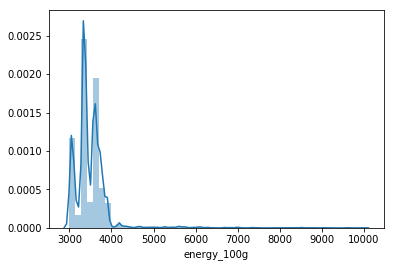

In [119]:
sns.distplot(df[(df['energy_100g'] > 3000) & (df['energy_100g'] < 10000)]['energy_100g'])
df[df['energy_100g'] > 10000]['energy_100g']

On définit la limite des outliers à 4000 kJ pour 100g. Il n'est pas impossible que certains lipides soient un peu plus denses énergétiquement que la moyenne de 37 kJ/g. En revanche au-delà de 4000, il semblerait qu'il s'agisse davantage de données erronées (confusion J vs. kJ ou énergie pour des portions > 100g). On a également des valeurs aberrantes parfois bien au-delà de 10000 kJ / 100g qui parasitent les analyses sensibles aux outliers (comme la régression linéaire par exemple). On supprimera donc toutes les valeurs supérieurs à 4000 kJ/100g.

http://www.unlockfood.ca/en/Articles/Nutrition-Labelling/Decoding-the-Nutrition-Label.aspx
https://fiberfacts.org/fibers-count-calories-carbohydrates/
https://dtc.ucsf.edu/living-with-diabetes/diet-and-nutrition/understanding-carbohydrates/counting-carbohydrates/learning-to-read-labels/

In [37]:
df_save['energy_100g'].where(df_save['energy_100g'] >= 0, inplace=True)
df_save['energy_100g'].where(df_save['energy_100g'] <= 4000, inplace=True)

for col in children_dict:
    df_save[col].where(df_save[col] >= 0, inplace=True)
    df_save[col].where(df_save[col] <= 100, inplace=True)

### Remplacement des valeurs manquantes par régression linéaire

In [121]:
import statsmodels.api as sm

df_test = df[df['energy_100g'] > 0].dropna(subset=['fat_100g', 'carbohydrates_100g', 'proteins_100g', 'sugars_100g', 'fiber_100g'])

X = df_test[['fat_100g', 'carbohydrates_100g', 'proteins_100g', 'sugars_100g', 'fiber_100g']]
y = df_test['energy_100g']

lin_reg = sm.OLS(y, X).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:            energy_100g   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     1216.
Date:                Thu, 25 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:01:54   Log-Likelihood:            -1.8568e+06
No. Observations:              179098   AIC:                         3.714e+06
Df Residuals:                  179093   BIC:                         3.714e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
fat_100g              34.6246      1

Puisque les 4 variables "énergie", "lipides", "glucides" et "protéines" sont fortement corrélées linéairement (R² > 0.99), on va estimer les valeurs manquantes à partir des 3 autres.

In [38]:
from sklearn.linear_model import LinearRegression

lst = ['energy_100g', 'fat_100g', 'carbohydrates_100g', 'proteins_100g']
df_train = df[lst].dropna(subset=lst)

for elt in lst:
    # split between the studied varialbe and the 3 others
    X_list = [x for x in lst if x != elt]
    y = df_train[elt]
    X = df_train[X_list]
    
    lin_reg = LinearRegression(fit_intercept=True).fit(X, y)
    score = lin_reg.score(X, y)
    intercept = lin_reg.intercept_
    coef = {}
    
    for i, x in enumerate(X_list):
        coef[x] = lin_reg.coef_[i]
    
    # variable is NA, other three are not
    predict_index = df[(df[elt].isna()) & eval(" & ".join(["(df['{0}'] >= 0)".format(x) for x in X_list]))].index
    
    # save new values in the right df
    save_index = df_save[df_save.index.isin(predict_index)].index
    
    y_predicted = lin_reg.predict(df[df.index.isin(save_index)][X_list])
    df_save.loc[save_index, elt] = y_predicted
    
del df_train

#### Remplacement des valeurs trop élevées après régression

In [39]:
df_save['energy_100g'].where(df_save['energy_100g'] >= 0, 0, inplace=True)
df_save['energy_100g'].where(df_save['energy_100g'] <= 4000, 4000, inplace=True)

for col in children_dict:
    df_save[col].where(df_save[col] >= 0, 0, inplace=True)
    df_save[col].where(df_save[col] <= 100, 100, inplace=True)

In [124]:
df_save.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,...,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,nutrition-score-fr_100g
count,248744.000000,248744.000000,248744.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,...,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,3.204050e+05,3.204050e+05,3.204050e+05,221072.000000
mean,1.935866,0.019671,0.055274,915.780157,9.697944,3.669450,0.740577,0.450272,0.008352,0.009523,...,0.002857,0.000097,0.000191,0.000015,0.000003,0.000011,1.055020e-07,1.375634e-08,3.452217e-07,9.164498
std,2.502217,0.140564,0.269282,840.557484,16.197571,7.082261,5.194851,3.318165,0.330090,0.577452,...,0.158348,0.009006,0.073125,0.002004,0.001077,0.006310,5.326850e-05,6.672934e-06,3.842740e-05,9.056232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-15.000000
25%,0.000000,0.000000,0.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
50%,1.000000,0.000000,0.000000,749.000000,1.200000,0.020000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,10.000000
75%,3.000000,0.000000,0.000000,1569.000000,14.300000,4.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,16.000000
max,31.000000,2.000000,6.000000,4000.000000,100.000000,100.000000,100.000000,98.000000,60.000000,71.000000,...,47.720000,4.000000,37.600000,0.700000,0.560000,3.571429,3.000000e-02,3.760000e-03,1.470000e-02,40.000000


In [125]:
with pd.option_context('max_columns', 500):
    display(df_save.describe())                    

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,starch_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,nutrition-score-fr_100g
count,248744.000000,248744.000000,248744.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,255319.000000,320405.000000,320405.000000,3.204050e+05,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,320405.000000,3.204050e+05,3.204050e+05,3.204050e+05,221072.000000
mean,1.935866,0.019671,0.055274,915.780157,9.697944,3.669450,0.740577,0.450272,0.008352,0.009523,0.030034,0.009024,24.398563,12.212720,0.026504,1.774170,5.755706,1.264713,0.798641,0.101067,0.000176,1.754988e-07,0.000237,0.000098,0.006400,0.010830,0.008741,0.000540,0.000495,0.000618,0.000001,0.000019,0.000453,0.000002,0.000030,0.025075,0.000046,0.044883,0.005000,0.001601,0.002857,0.000097,0.000191,0.000015,0.000003,0.000011,1.055020e-07,1.375634e-08,3.452217e-07,9.164498
std,2.502217,0.140564,0.269282,840.557484,16.197571,7.082261,5.194851,3.318165,0.330090,0.577452,0.632850,0.240325,28.842757,19.708321,1.161989,3.881509,7.846441,5.608902,50.518658,1.526696,0.048028,5.337869e-05,0.045016,0.055208,0.306033,0.368483,0.239226,0.051895,0.175624,0.147593,0.000709,0.010600,0.128197,0.000460,0.003542,0.308588,0.003901,0.391598,0.159373,0.141973,0.158348,0.009006,0.073125,0.002004,0.001077,0.006310,5.326850e-05,6.672934e-06,3.842740e-05,9.056232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-15.000000
25%,0.000000,0.000000,0.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
50%,1.000000,0.000000,0.000000,749.000000,1.200000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.200000,2.860000,0.000000,0.000000,3.000000,0.187960,0.229000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,10.000000
75%,3.000000,0.000000,0.000000,1569.000000,14.300000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,14.890000,0.00

In [126]:
df_alcohol = df[(df['energy_100g']>0) & (df['alcohol_100g']>0)][['energy_100g', 'alcohol_100g']]

X = df_alcohol['alcohol_100g'][:, None]
y = df_alcohol['energy_100g']

lin_reg2 = LinearRegression(fit_intercept=False).fit(X, y)
print(lin_reg2.coef_, lin_reg2.intercept_)
print(lin_reg2.score(X,y))

del df_alcohol

[25.48673013] 0.0
-0.6794850432012751


Score trop faible pour faire une imputation pour l'alcool

https://sante.journaldesfemmes.fr/calories/classement/aliments/proteines
Un taux supérieur à 40% de protéines n'est pas normal. Seuls des aliments hyperprotéinés peuvent dépasser ce taux.

### Traitement de la colonne "quantity" pour en extraire l'unité et les valeurs numériques

C:\Users\Jerome\Anaconda3\envs\py37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


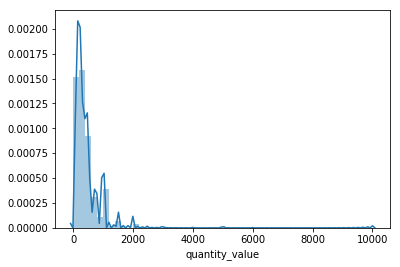

In [40]:
import re

pattern = re.compile("(\d)*(\.|,)?(\d)+(\s)*[kKcCmM]?[gGlL]")
subtracted_qty = df_save.quantity.astype('str').apply(lambda s: pattern.search(s).group(0) if pattern.search(s) else None)

number_pattern = re.compile("(\d)*(\.|,)?(\d)+")
raw_values = [float(number_pattern.search(s).group(0).replace(',','.')) if s else None for s in subtracted_qty]

unit_pattern = re.compile("[kKcCmM]?[gGlL]")
units = [unit_pattern.search(s).group(0).lower() if s else None for s in subtracted_qty]

unif_values = []
unif_units = []

# unification of mass and volume units, respectivly in g and ml
for val, unit in zip(raw_values, units):
    if unit == "kg":
        unif_values.append(val * 1000)
        unif_units.append("g")
    elif unit == "g":
        unif_values.append(val)
        unif_units.append("g")
    elif unit == "mg":
        unif_values.append(val / 1000)
        unif_units.append("g")
    elif unit == "l":
        unif_values.append(val * 1000)
        unif_units.append("ml")
    elif unit == "cl":
        unif_values.append(val * 10)
        unif_units.append("ml")
    elif unit == "ml":
        unif_values.append(val)
        unif_units.append("ml")
    else:
        unif_values.append(None)
        unif_units.append(None)

# cap values at 10kg / 10l        
unif_values = [x if isinstance(x, float) and (x <= 10000) else np.NaN for x in unif_values]

df_save['quantity_value'] = unif_values
df_save['quantity_unit'] = unif_units

sns.distplot(df_save['quantity_value'].dropna())

### Traitement des ingrédients

In [128]:
for i in df.sample(10).index:
    print(df.at[i, 'ingredients_text'])

Pure cane sugar, pineapple in natural juice, water, prepared horseradish (horseradish, distilled vinegar, water, salt, and soybean oil), apple juice concentrate, mustard seed, pineapple juice concentrate, and black pepper.
California pistachios, sea salt.
Filtered water, organic matcha green tea, organic cane sugar, kombucha (filtered water, organic first flush darjeeling black tea, organic assam black tea, yeast and bacteria cultures), organic miso (organic whole soybeans, organic handmade brown rice koji, sun-dried sea salt, blue ridge mountain well water, koji spores), yuzu juice, organic spirulina.
Sugar, cocoa butter, whole milk powder cocoa mass, whey powder, emulsifiers (soy lecithin & polyglycerol polyricinoleic acid), natural vanilla flavoring, artificial color (fd& c red 40 lake).
_Buttermilch_, 15% Fruchtzubereitung (Zucker, Glukose-Fruktose-Sirup, 10% Zitronensaft aus Zitronensaftkonzentrat, 5,6% Limettensaft aus Limettensaftkonzentrat, modifizierte Stärke, Orangensaft aus 

Problèmes constatés :
- texte entre parenthèses pas toujours utile et n'est pas lié aux ingrédients
- des virgules utilisées comme séparateur de décimales et qui peuvent interférer avec le split des ingrédients
- des accents
- des caractères spéciaux

In [41]:
import unicodedata
import re

not_string_pattern = re.compile('[^a-zA-Z,; ]+')
ingredients_translations = ["ingredients", "ingredient", "zutaten", "zutat"]
split_chars = "^,|;"
decimal_pattern = re.compile(r'(?<=\d)[,|;](?=\d)')

def remove_text_inside_brackets(text, brackets="()[]"):
    count = [0] * (len(brackets) // 2) # count open/close brackets
    saved_chars = []
    for character in text:
        for i, b in enumerate(brackets):
            if character == b: # found bracket
                kind, is_close = divmod(i, 2)
                count[kind] += (-1)**is_close # `+1`: open, `-1`: close
                if count[kind] < 0: # unbalanced bracket
                    count[kind] = 0  # keep it
                else:  # found bracket to remove
                    break
        else: # character is not a [balanced] bracket
            if not any(count): # outside brackets
                saved_chars.append(character)
    return ''.join(saved_chars)

def strip_accents(text):
    try:
        text = unicode(text, 'utf-8')
    except (TypeError, NameError): # unicode is a default on python 3 
        pass
    text = unicodedata.normalize('NFD', text)
    text = text.encode('ascii', 'ignore')
    text = text.decode("utf-8")
    return str(text)

def lower_text(text):
    return text.lower()

def remove_ingredients_strings(text):
    cleaned_text = text
    for translation in ingredients_translations:
        cleaned_text = cleaned_text.replace(translation, '')
    return cleaned_text

def replace_decimal_commas(text):
    return decimal_pattern.sub(".", text)

def strings_only(text):
    return not_string_pattern.sub('', text)

def text_split(text):
    return re.findall(r"["+split_chars+"]+", text)

def trim(string):
    return string.strip(" ")

def ingredients_to_list(text):
    try:
        text = remove_text_inside_brackets(text)
        text = strip_accents(text)
        text = lower_text(text)
        text = remove_ingredients_strings(text)
        text = replace_decimal_commas(text)
        text = strings_only(text)
        ingredients_list = text_split(text)
        return [trim(ingredient) for ingredient in ingredients_list if trim(ingredient) != ""]
    except TypeError:
        return []

In [42]:
df_save['ingredients_list'] = df_save['ingredients_text'].apply(ingredients_to_list)
df_save['ingredients_list'] = df_save['ingredients_list'].apply(lambda d: d if isinstance(d, list) else [])
df_save['ingredients_n'] = df_save['ingredients_list'].apply(len)
df_save['ingredients'] = df_save['ingredients_list'].apply(lambda l: ",".join(l))

In [131]:
for text in df_save['ingredients_list'].sample(5):
    print(text)

['red beets', 'water', 'sugar', 'spirit vinegar', 'salt', 'acidity regulator citric acid', 'pimento', 'cinnamon']
[]
['raisins', 'peanuts', 'mango', 'pineapple', 'apricots', 'banana chips']
[]
['pineapple', 'strawberries']


In [132]:
with pd.option_context("display.max_columns", 0):
    display(df_save.sample(5))

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,starch_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,nutrition-score-fr_100g,quantity_value,quantity_unit,ingredients_list,ingredients_n,ingredients
103461,85239203286,http://world-fr.openfoodfacts.org/produit/0085...,usda-ndb-import,1489061529,2017-03-09T12:12:09Z,1489061529,2017-03-09T12:12:09Z,Organic Honey All Natural,NaN,NaN,NaN,NaN,Simply Balanced,simply-balanced,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,Honey,NaN,NaN,NaN,NaN,NaN,21 g (1 Tbsp),0.0,[ honey -> en:honey ],NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,1197.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.95,80.95,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,None,[honey],1,honey
238470,3560070474158,http://world-fr.openfoodfacts.org/produit/3560...,sebleouf,1452970050,2016-01-16T18:47:30Z,1475420683,2016-10-02T15:04:43Z,NaN,NaN,NaN,"barquette,plastique","barquette,plastique",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Lyon,France",Carrefour,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,http://fr.openfoodfacts.org/images/products/35...,http://fr.openfoodfacts.org/images/products/35...,1095.0,13.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,23.00,1.40,0.0,1.4,12.0,1.60,0.629921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,NaN,None,[],0,
294454,7613269684282,http://world-fr.openfoodfacts.org/produit/7613...,openfood-ch-import,1486509171,2017-02-07T23:12:51Z,1486509172,2017-02-07T23:12:52Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Suisse,en:switzerland,Suisse,"margarine (huile de palme, huile de colza, eau...",NaN,NaN,NaN,NaN,NaN,NaN,4.0,[ margarine -> fr:margarine ] [ huile-de-pa...,"en:e471,en:e330,en:e461,en:e202",E471 - Mono- et diglycérides d'acides gras ali...,1.0,huile-de-palme,1.0,e471-mono-et-diglycerides-d-acides-gras-alimen...,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A co

### Analyse des labels et identification des produits bio

In [44]:
labels_tags = {}
for i in df.index:
    tags = str(df.at[i, 'labels_tags']).split(",")
    for tag in tags:
        if tag in labels_tags:
            labels_tags[tag] += 1
        else:
            labels_tags[tag] = 1
            
sorted_labels_tags = sorted(labels_tags, key=labels_tags.get, reverse=True)

for tag in sorted_labels_tags[:20]:
    print(f"{tag}: {labels_tags[tag]}")

nan: 274128
en:organic: 14129
en:eu-organic: 13286
fr:ab-agriculture-biologique: 9977
en:green-dot: 9493
en:vegetarian: 5137
en:vegan: 4084
en:no-preservatives: 3595
fr:eco-emballages: 3381
en:gluten-free: 3194
en:fr-bio-01: 2616
en:no-colorings: 2313
en:made-in-france: 1907
fr:viande-francaise: 1855
en:labels-of-distributors: 1630
en:low-or-no-sugar: 1523
en:palm-oil-free: 1387
en:fsc: 1314
en:no-added-sugar: 989
fr:selection-intermarche: 959


In [45]:
bio_labels = []
for tag in sorted_labels_tags:
    if ("organic" in tag or "bio" in tag or "oko" in tag) and labels_tags[tag] >= 15:
        print(f"{tag}: {labels_tags[tag]}")
        bio_labels.append(tag)

en:organic: 14129
en:eu-organic: 13286
fr:ab-agriculture-biologique: 9977
en:fr-bio-01: 2616
de:eg-oko-verordnung: 621
en:de-oko-001: 453
en:fr-bio-10: 326
en:de-oko-006: 236
en:nl-bio-01: 194
de:bio-7-initiative: 168
en:usda-organic: 146
en:be-bio-01: 139
en:biodynamic-agriculture: 138
en:de-oko-003: 136
en:it-bio-006: 135
en:de-oko-007: 130
en:bioland: 123
en:ch-bio-006: 99
en:de-oko-013: 96
en:it-bio-007: 94
fr:ecocert-fr-bio-01: 87
en:it-bio-009: 83
en:de-oko-024: 70
en:soil-association-organic: 68
en:it-bio-014: 64
en:be-bio-02: 57
en:fr-bio-09: 56
en:at-bio-301: 53
en:de-oko-005: 51
en:it-bio-008: 41
fr:bourgeon-bio: 41
en:de-oko-037: 34
de:okologische: 32
fr:bio-solidaire: 31
fr:biogarantie: 24
fr:bio-equitable: 22
fr:lk-bio-149: 22
en:ch-bio-004: 22
en:bio: 20
en:at-bio-402: 18
en:de-oko-039: 18
en:ab-agriculture-biologique: 18
en:de-oko-034: 17
en:it-bio-005: 17
en:cz-bio-001: 17
en:canada-organic: 16
en:bio-europeen: 16
en:de-oko-012: 15


In [46]:
def contains_bio_label(string):
    return any(label in string for label in bio_labels)

is_bio_labels = df_save.labels_tags.apply(lambda s: contains_bio_label(str(s)))
print(is_bio_labels.sum())
print(df_save.labels_tags.str.contains("en:organic").sum())

14156
14134


In [47]:
df_save['is_organic'] = df_save['labels_tags'].apply(lambda s: contains_bio_label(str(s))).astype(float)

In [48]:
df_save['is_organic'].value_counts()

0.0    306249
1.0     14156
Name: is_organic, dtype: int64

Les produits sans label peuvent l'être parce qu'il n'y en a pas et pas parce que la saisie n'a pas été faite.
On cherche un moyen pour trouver différencier valeur manquante et valeur à blanc

In [138]:
tmp = pd.concat((df, tags_df), axis=1)
display(tmp[~tmp['labels_tags'].isna()][tags_df.columns].mean(numeric_only=True))
display(tmp[tags_df.columns].mean(numeric_only=True))
del tmp

complete            0.725645
nutrition_facts     0.941986
ingredients         0.828338
brands              0.983256
product_name        0.992625
categories          0.900652
quantity            0.905969
characteristics     0.844482
packaging_code      0.102564
packaging           0.866199
photos_uploaded     0.950497
photos_validated    0.764428
expiration_date     0.539769
to_be_checked       0.725645
dtype: float64

complete            0.184308
nutrition_facts     0.856362
ingredients         0.775414
brands              0.911326
product_name        0.944450
categories          0.262978
quantity            0.326618
characteristics     0.225908
packaging_code      0.023369
packaging           0.246066
photos_uploaded     0.425742
photos_validated    0.210012
expiration_date     0.131255
to_be_checked       0.184308
dtype: float64

A defaut d'avoir un état qui indique clairement que les labels sont inexistants, on préfèrera supposer que les labels sont manquants quand l'état est "incomplet". Sinon ils seront considérés comme vides.

In [49]:
nan_index = df_save[(df_save['labels_tags'].isna()) & (df_save['states_tags'].str.contains("en:to-be-completed"))].index
df_save.loc[nan_index, 'is_organic'] = np.NaN
print(len(nan_index))

248532


In [140]:
df_save['is_organic'].sample(10)

105934    NaN
116633    0.0
293648    NaN
309871    0.0
69951     NaN
261570    0.0
207097    0.0
237499    NaN
37507     NaN
17413     NaN
Name: is_organic, dtype: float64

In [141]:
df_save[df_save['product_name'].str.contains("bio", na=False)][['product_name', 'is_organic']]

,product_name,is_organic
4472,"Organic Probiotic Kefir, Strawberry",NaN
11117,"House Kombucha, 100% Raw And Probiotic Kombuch...",NaN
11745,Vinaigre basalmique bio,0.0
13497,Tomates bio,NaN
13544,"Probiotic Organic Kefir, Raspberry",NaN
13550,Organic Probiotic Kefir Bites,NaN
13552,Organic Probiotic Goo-Berry Pie Bites,NaN
13553,Organic Probiotic Kefir Bites,NaN
13584,"Probiotic, Protein Kefir",NaN
13586,"Probiotic Kefir Cultured Lowfat Milk Smoothie,...",NaN


In [51]:
tmp_df = df_save[~df_save['is_organic'].isna()]

In [214]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tmp_df['product_name'].fillna(""))
y = tmp_df['is_organic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf = RandomForestClassifier(100)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[18053   996]
 [ 2031  2647]]
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92     19049
         1.0       0.73      0.57      0.64      4678

   micro avg       0.87      0.87      0.87     23727
   macro avg       0.81      0.76      0.78     23727
weighted avg       0.86      0.87      0.87     23727



In [232]:
tmp_df['brands'].fillna("").nunique()

19264

In [233]:
tmp_df['brands_tags'].fillna("").nunique()

16330

In [52]:
brands_series = tmp_df['brands_tags'].fillna("")
brands_unique = brands_series.unique()
labels_dict = dict(zip(brands_unique, range(len(brands_unique))))
brands_labels = brands_series.map(labels_dict)

In [241]:
import scipy

vectorizer = CountVectorizer()

X_left = vectorizer.fit_transform(tmp_df['product_name'].fillna(""))
X_right = brands_labels.values.reshape(-1,1)

X = scipy.sparse.hstack((X_left, X_right))
y = tmp_df['is_organic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf = RandomForestClassifier(100)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[18260   795]
 [ 1770  2902]]
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93     19055
         1.0       0.78      0.62      0.69      4672

   micro avg       0.89      0.89      0.89     23727
   macro avg       0.85      0.79      0.81     23727
weighted avg       0.89      0.89      0.89     23727



In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import scipy

vectorizer = TfidfVectorizer()

X_1 = vectorizer.fit_transform(tmp_df['product_name'].fillna(""))
X_2 = brands_labels.values.reshape(-1,1)
X_3 = tmp_df['additives_n'].fillna(df_save['is_organic'].mean()).values.reshape(-1,1)

X = scipy.sparse.hstack((X_1, X_2, X_3))
y = tmp_df['is_organic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf = RandomForestClassifier(100)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[18464   604]
 [ 1649  3002]]
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94     19068
         1.0       0.83      0.65      0.73      4651

   micro avg       0.91      0.91      0.91     23719
   macro avg       0.88      0.81      0.83     23719
weighted avg       0.90      0.91      0.90     23719



In [270]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)

print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

C:\Users\Jerome\Anaconda3\envs\py37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[18737   303]
 [ 4215   472]]
              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89     19040
         1.0       0.61      0.10      0.17      4687

   micro avg       0.81      0.81      0.81     23727
   macro avg       0.71      0.54      0.53     23727
weighted avg       0.78      0.81      0.75     23727



In [252]:
tmp_df = tmp_df[['product_name', 'is_organic']]
tmp_df['predict'] = clf.predict(X)

In [254]:
tmp_df[tmp_df['product_name'].str.contains("bio", na=False)].describe()

,is_organic,predict
count,1207.000000,1207.000000
mean,0.973488,0.974316
std,0.160719,0.158255
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [264]:
tmp_df[(tmp_df['product_name'].str.contains("bio", na=False)) & (tmp_df['is_organic']==tmp_df['predict'])].describe()

,is_organic,predict
count,1186.000000,1186.000000
mean,0.982293,0.982293
std,0.131938,0.131938
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [268]:
tmp_df[tmp_df['product_name'].str.contains("organic", na=False)].describe()

,is_organic,predict
count,22.000000,22.000000
mean,0.727273,0.772727
std,0.455842,0.428932
min,0.000000,0.000000
25%,0.250000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [267]:
tmp_df[(tmp_df['product_name'].str.contains("organic", na=False)) & (tmp_df['is_organic']==tmp_df['predict'])].describe()

,is_organic,predict
count,21.000000,21.000000
mean,0.761905,0.761905
std,0.436436,0.436436
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [262]:
tmp_df[tmp_df['product_name'].str.match("^(.)*bio[^t]|(.)*$]", na=False)].describe()

,is_organic,predict
count,588.000000,588.000000
mean,0.972789,0.974490
std,0.162836,0.157803
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


Il est trop compliqué de remplir toutes les valeurs manquantes avec une bonne précision, le risque d'erreur est trop élevé. En revanche, on pourrait sélectivement remplir les valeurs lorsque le classifieur prédit que le produit est bio et qu'on trouve le terme dans la description.

### Sauvegarde des traitements pour l'analyse

In [56]:
df_save.drop(columns='ingredients_list', inplace=True)
df_save.to_csv('food_facts_analysis.csv', sep='\t', encoding='utf-8', index=False)

### Suppression des colonnes  (inutiles pour le client)

In [142]:
df_save.drop(inplace=True, columns=[
    'packaging_tags',
    'brands_tags',
    'categories',
    'countries',
    'countries_tags',
    'cities',
    'origins_tags',
    'manufacturing_places_tags',
    'labels',
    'labels_tags',
    'emb_codes_tags',
    'traces',
    'traces_tags',
    'allergens_fr',
    'additives',
    'additives_tags',
    'states_tags',
    'main_category',
])

### Sauvegarde des lignes utiles pour le client

In [144]:
states_tags = {}
for i in df.index:
    tags = str(df.at[i, 'states_fr']).split(",")
    for tag in tags:
        if tag in states_tags:
            states_tags[tag] += 1
        else:
            states_tags[tag] = 1
            
sorted_states_tags = sorted(states_tags, key=states_tags.get, reverse=True)

for tag in sorted_states_tags:
    print(f"{tag}: {states_tags[tag]}")

Nom du produit complete: 302953
Marques complétées: 292328
Date limite à compléter: 278623
Informations nutritionnelles complétées: 274697
A compléter: 261605
Ingrédients complétés: 248731
Caractéristiques à compléter: 248261
Emballage à compléter: 241786
Catégories à compléter: 236360
en:Packaging-code-to-be-completed: 232213
Quantité à compléter: 215946
Photos à envoyer: 184160
Photos envoyées: 136566
Quantité complétée: 104770
Catégories complétées: 84356
Emballage complété: 78931
Caractéristiques complétées: 72465
Ingrédients à compléter: 71995
Photos à valider: 69200
Photos validées: 67366
A vérifier: 59121
Complet: 59121
Informations nutritionnelles à compléter: 46029
Date limite complétée: 42103
Marques à compléter: 28387
Nom du produit à compléter: 17762
en:Packaging-code-completed: 7496
Vide: 99
nan: 46


On supprime les lignes qui ne permettront pas à l'utilisateur de retrouver le produit :
- Nom manquant
- Marque manquante

On supprime les lignes qui ne permettent pas de savoir si le produit est sain :
- Informations nutritionnelles manquantes

In [145]:
index_to_drop = df_save[
    (df_save['states_fr'].str.contains('Informations nutritionnelles à compléter'))
    | (df_save['states_fr'].str.contains('Nom du produit à compléter'))
    | (df_save['states_fr'].str.contains('Marques à compléter'))
].index

index_to_drop = list(set(index_to_drop))

df_save.drop(index=index_to_drop, inplace=True)
df_save.to_csv('food_facts_customer.csv', sep='\t', encoding='utf-8', index=False)

### Tentative de traduction des ingrédients

Finalement avortée car les algorithmes disponibles ne permettent pas de traduire simplement plus de 100k ingrédients différents

In [262]:
import langdetect

def lang_detection(text):
    try:
        return langdetect.detect(text)
    except:
        return None
    
df["ingredients_language"] = None
idx = df[(~df["ingredients_text"].isna()) & (df["ingredients_text"].str.len() > 0)].index
df.loc[idx, "ingredients_language"] = df[df.index.isin(idx)]["ingredients_text"].apply(lang_detection)

In [281]:
df[["ingredients_text", "ingredients_language"]].sample(5)

,ingredients_text,ingredients_language
54164,"Carbonated water, high fructose corn syrup, ca...",en
300519,NaN,None
137912,100% pure and natural orange juice.,ro
227125,NaN,None
151915,Wholemeal farro (triticum dicoccum) flour (33%...,en


In [124]:
df["ingredients_language"] = detected_lang

In [125]:
idx = df[(df['ingredients_list'].map(lambda d: len(d)) > 0) & (~df['ingredients_list'].isna()) & (df['ingredients_language'].isna())].index
joined_ingredients = [", ".join(df.loc[i, 'ingredients_list']) for i in idx]

In [127]:
len(joined_ingredients)

72503

In [1]:
from textblob import TextBlob
languages = []
for i, joined_ing in enumerate(joined_ingredients):
    try:
        languages.append(TextBlob(joined_ing).detect_language())
    except:
        languages.append(None)
    finally:
        print(i)
#languages = [TextBlob(joined_ing).detect_language() for joined_ing in joined_ingredients]

NameError: name 'joined_ingredients' is not defined

In [342]:
len(df[df["ingredients_text"].str.len()<200].index)

142051

In [ ]:
len(languages)

In [78]:
sugar_translations = {
    'zucker': 'de',
    'sugar': 'en',
    'azucar': 'es',
    'sucre': 'fr',
    'zucchero': 'it',
    'suiker': 'nl',
    'cukier': 'pl',
    'acucar': 'pt',
    'zahar': 'ro',
    'socker': 'sv',
}

languages = [
    'de',
    'en',
    'es',
    'fr',
    'it',
    'nl',
    'pl',
    'pt',
    'ro',
    'sv',
]


In [51]:
for sucre in sugar_translations:
    print(f"{sucre}: {sucre in ingredients_count}")

zucker: True
sugar: True
azucar: True
sucre: True
zucchero: True
suiker: True
cukier: True
acucar: True
zahar: True
socker: True


In [32]:
strip_accents("açúcar")

'acucar'

In [53]:
sorted_translations = [ing for ing in sorted_ingredients_count if ing in sugar_translations]
print(sorted_translations)

['sugar', 'sucre', 'zucker', 'azucar', 'acucar', 'zucchero', 'suiker', 'zahar', 'socker', 'cukier']


In [105]:
dict_ing = {}
for sug in sorted_translations:
    lang = sugar_translations[sug]
    dict_ing[lang] = {sug: 0}
    for ing_list in df['ingredients_list']:
        if sug in ing_list:
            for ing in ing_list:
                if ing in dict_ing[lang]:
                    dict_ing[lang][ing] += 1
                else:
                    dict_ing[lang][ing] = 1
                    
level_1 = {}
for lang in languages:
    level_1[lang] = {k: v for k, v in dict_ing[lang].items() if v >= 10 and len(k) > 2}

other_dicts = {}
for lang in languages:
    other_dicts[lang] = list(set(k for k in level_1[l] for l in languages if l != lang))
    level_1[lang] = {k: v for k, v in level_1[lang].items() if k not in other_dicts[lang]}
    
level_2 = {}
for lang in languages:
    level_2[lang] = {k: 0 for k in level_1[lang]}
    for ing_list in df['ingredients_list']:
        for ing in ing_list:
            if ing in level_1[lang]:
                level_2[lang][ing] += 1
            else:
                level_2[lang][ing] = 1
    level_2[lang] = {k: v for k, v in level_2[lang].items() if v >= 10 and len(k) > 2}
    
for lang in languages:
    other_dicts[lang] = list(set(k for k in level_2[l] for l in languages if l != lang))
    level_2[lang] = {k: v for k, v in level_2[lang].items() if k not in other_dicts[lang]}

In [106]:
level_2

{'de': {'zucker': 1680,
  'kakaomasse': 503,
  'kakaobutter': 518,
  'vollmilchpulver': 375,
  'palmol': 204,
  'glukosefruktosesirup': 197,
  'butterreinfett': 303,
  'dextrose': 13173,
  'emulgator lecithine': 185,
  'glukosesirup': 313,
  'mandeln': 160,
  'aroma': 670,
  'magermilchpulver': 424,
  'kaffee': 15,
  'chili': 341,
  'salz': 643,
  'knoblauch': 226,
  'weinessig': 39,
  'konservierungsstoffe kaliumsorbat': 10,
  'verdickungsmittel xanthan': 34,
  'wasser': 958,
  'senfsaat': 25,
  'gewurze': 516,
  'weizenmehl': 568,
  'eigelb': 59,
  'fettarmer kakao': 67,
  'invertzucker': 14,
  'stabilisatoren': 43,
  'vanilleextrakt': 63,
  'naturliches vanillearoma': 82,
  'emulgator': 222,
  'geschmacksverstarker': 20,
  'modifizierte maisstarke': 38,
  'uberzugsmittel': 20,
  'fettarmes kakaopulver': 121,
  'apfel': 99,
  'citronensaure': 24,
  'buttermilchpulver': 13,
  'meersalz': 351,
  'maltodextrin': 7325,
  'zwiebelpulver': 47,
  'weizenstarke': 121,
  'hefe': 233,
  'papri

In [112]:
ing_languages = []
for ing_list in df['ingredients_list']:
    ing_list_languages = {
        'de': 0,
        'en': 0,
        'es': 0,
        'fr': 0,
        'it': 0,
        'nl': 0,
        'pl': 0,
        'pt': 0,
        'ro': 0,
        'sv': 0,
        'total': 0,
    }
    for ing in ing_list:
        ing_list_languages['total'] += 1
        for language in level_2:
            if ing in level_2[language]:
                ing_list_languages[language] += 1
    ing_languages.append(ing_list_languages)

In [113]:
print(ing_languages[26:32])
print(df['ingredients_list'].loc[26:32])

[{'de': 0, 'en': 0, 'es': 0, 'fr': 0, 'it': 0, 'nl': 0, 'pl': 0, 'pt': 0, 'ro': 0, 'sv': 0, 'total': 10}, {'de': 0, 'en': 2, 'es': 0, 'fr': 0, 'it': 0, 'nl': 0, 'pl': 0, 'pt': 0, 'ro': 0, 'sv': 0, 'total': 4}, {'de': 0, 'en': 2, 'es': 0, 'fr': 0, 'it': 0, 'nl': 0, 'pl': 0, 'pt': 0, 'ro': 0, 'sv': 0, 'total': 3}, {'de': 0, 'en': 1, 'es': 0, 'fr': 0, 'it': 0, 'nl': 0, 'pl': 0, 'pt': 0, 'ro': 0, 'sv': 0, 'total': 3}, {'de': 0, 'en': 0, 'es': 0, 'fr': 0, 'it': 0, 'nl': 0, 'pl': 0, 'pt': 0, 'ro': 0, 'sv': 0, 'total': 1}, {'de': 0, 'en': 0, 'es': 0, 'fr': 0, 'it': 0, 'nl': 0, 'pl': 0, 'pt': 0, 'ro': 0, 'sv': 0, 'total': 1}]
26    [organic whole rolled oats, organic expeller p...
27    [whole cashews, sunflower oil, salt, black pep...
28               [cashews, curry seasoning, canola oil]
29          [almonds, wasabi spice, tamari shoyu sauce]
30                                    [organic coconut]
31                                 [organic red quinoa]
32                [coconut bar, dark c

In [120]:
detected_lang = [None] * len(df.index)
for i, lang_counts in enumerate(ing_languages):
    for k, v in lang_counts.items():
        if v > lang_counts['total'] / 2 and k != 'total':
            detected_lang[i] = k

In [122]:
len([x for x in detected_lang if x])

175837